# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliares: Catherine Benavides y Consuelo Rojas
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: **SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Sergio Rehbein
- Nombre de alumno 2: Matías Cornejo

\### **Link de repositorio de GitHub Matias:** https://github.com/s-kill/MDS7202

\### **Link de repositorio de GitHub Sergio:** https://github.com/sergiorehbein/MDS7201---Proyecto-de-Ciencia-de-Datos


### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento se utilizan para entrenar el modelo, es decir, para ajustar los parámetros del modelo de manera que pueda aprender patrones. Por otro lado, los datos de validación se utilizan para evaluar el rendimiento del modelo después del entrenamiento.
2. El principal desafío al trabajar problemas de clasificación con datos no supervisados es la falta de etiquetas o categorías conocidas en los datos. En ausencia de etiquetas, el modelo puede agrupar los datos de formas inesperadas o no deseadas
3. La matriz de confusión se utiliza en problemas de clasificación para visualizar el rendimiento de un modelo al predecir las clases de las muestras.
4.
  * Accuracy = Número de predicciones correctas / Número total de predicciones:Se interpreta como la capacidad general del modelo para predecir correctamente las clases de las muestras.
  * Precision = Verdaderos positivos / (Verdaderos positivos + Falsos positivos):Se interpreta como la capacidad del modelo para evitar hacer predicciones positivas incorrectas.
  * Recall = Verdaderos positivos / (Verdaderos positivos + Falsos negativos): Se interpreta como la capacidad del modelo para identificar correctamente todas las instancias positivas.
  * F1 score = 2 * (Precision * Recall) / (Precision + Recall): Se interpreta como una métrica única que tiene en cuenta tanto la precisión como la exhaustividad del modelo.

5.
  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: Se utilizaría el recall como métrica principal en este contexto, ya que es importante identificar correctamente la mayor cantidad posible de fallas.
  * Detección de enfermedades altamente contagiosas: Se podría priorizar el(recall) para garantizar que la mayor cantidad posible de casos positivos sean identificados y tratados a tiempo.
  * Aprobación de créditos de alto riesgo: En este contexto, la precisión es crucial ya que se quiere minimizar el número de créditos aprobados incorrectamente (falsos positivos).
  * Detección de crímenes: Aquí, se podría priorizar el recall, ya que es fundamental identificar la mayor cantidad posible de crímenes (verdaderos positivos).

6. La calibración de modelos se refiere al proceso de ajustar la salida de un modelo de clasificación para que refleje de manera precisa las probabilidades reales de las clases.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
!git clone https://github.com/sergiorehbein/lab07.git

fatal: destination path 'lab07' already exists and is not an empty directory.


In [3]:
from IPython.display import HTML

# Lee el contenido del archivo HTML y lo muestra en el notebook
HTML(open("/content/lab07/Player_Stats_Report.html").read())

Number of variables,39
Number of observations,17588
Missing cells,16514
Missing cells (%),2.4%
Duplicate rows,0
Duplicate rows (%),0.0%
Total size in memory,5.2 MiB
Average record size in memory,312.0 B
Categorical,8
Numeric,31
Name has a high cardinality: 17341 distinct values,High cardinality


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [3]:
import pandas as pd

df_0=pd.read_csv('/content/lab07/stats_players.csv')

In [4]:
df=df_0.copy()
df['labels'] = df['National_Position'].notnull().astype(int)
df = df.drop('National_Position', axis=1)
df['labels'].value_counts()

labels
0    16513
1     1075
Name: count, dtype: int64

#### 1.1.2 Se puede notar que existen dos etiquetas dado que es una clasificación binaria, en donde estamos presente frente a una clase desbalanceada dado que los seleccionados son solamente el 6,11 % del total.

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import CountEncoder

# Definir las columnas numéricas y categóricas
columnas_numericas = ['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
                      'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
                      'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
                      'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility',
                      'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
                      'Freekick_Accuracy', 'Penalties', 'Volleys']

columnas_categoricas = ['Name', 'Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate']

# Definir las transformaciones para las columnas numéricas y categóricas
transformaciones_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Llenar valores faltantes con la mediana
    ('scaler', StandardScaler())  # Normalizar los valores
])

transformaciones_categoricas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Llenar valores faltantes con el valor más frecuente
    ('countencoder', CountEncoder()) # Codificar variables categóricas
])

# Crear el ColumnTransformer
col_transformer = ColumnTransformer(transformers=[
    ('num', transformaciones_numericas, columnas_numericas),
    ('cat', transformaciones_categoricas, columnas_categoricas)
], remainder='passthrough')



#### 1.1.4 justificación

Para las columnas numéricas, se utilizó un SimpleImputer con estrategia 'median' para llenar los valores faltantes con la mediana de cada columna. La elección es porque la mediana es menos sensible a valores atípicos que la media, lo que puede ser importante en conjuntos de datos con posibles valores extremos que puedan distorsionar la media. Además, se aplicó un StandardScaler para normalizar los valores.

Para las columnas categóricas, se utilizó un SimpleImputer con estrategia 'most_frequent' para llenar los valores faltantes con el valor más frecuente en cada columna. Esto se hace para evitar la pérdida de información al eliminar filas con valores faltantes y para garantizar que todas las columnas tengan valores completos. Luego, se aplicó un CountEncoder para codificar las variables categóricas. Esta elección es debido a que como las variables poseen muchos valores distintos, es más certero usar la frecuencia que one-hot, dado que one-hot crearía tantas columnas como valores distintos haya.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('labels', axis=1)
y = df['labels']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#2
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Definir el clasificador para XGBoost
clasificador_xgboost = XGBClassifier()

# Definir el pipeline para XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocesamiento', col_transformer),
    ('clasificador', clasificador_xgboost)
])

# Definir el clasificador para LightGBM
clasificador_lightgbm = LGBMClassifier()

# Definir el pipeline para LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('preprocesamiento', col_transformer),
    ('clasificador', clasificador_lightgbm)
])

In [ ]:
# Entrenar el pipeline de XGBoost
pipeline_xgboost.fit(X_train, y_train)

# Entrenar el pipeline de LightGBM
pipeline_lightgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2585
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptio...
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('countencoder',
                                                                   CountEncoder(combine_min_nan_groups=True))]),
                                                  ['Name', 'Nationality',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate'])])),
                ('clasificador', LGBMClassifier())])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

#### 1.3.1 Métricas

In [ ]:
# Hacer predicciones con el pipeline de XGBoost
predicciones_xgboost = pipeline_xgboost.predict(X_test)
# Hacer predicciones con el pipeline de LightGBM
predicciones_lightgbm = pipeline_lightgbm.predict(X_test)

##### Xgboost

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas de evaluación para XGBoost solo para la clase positiva
precision_positiva_xgboost, recall_positiva_xgboost, _, _ = precision_recall_fscore_support(y_test, predicciones_xgboost, labels=[1])

# Imprimir las métricas para XGBoost solo para la clase positiva
print("Métricas para XGBoost - Clase Positiva:")
print("Precision:", precision_positiva_xgboost[0])
print("Recall:", recall_positiva_xgboost[0])

Métricas para XGBoost - Clase Positiva:
Precision: 0.65625
Recall: 0.39069767441860465


In [ ]:
from sklearn.metrics import classification_report

# Reporte de clasificación para XGBoost solo para la clase positiva
print("Reporte de Clasificación para XGBoost - Clase Positiva:")
print(classification_report(y_test, predicciones_xgboost, target_names=['No seleccionado', 'Seleccionado']))

Reporte de Clasificación para XGBoost - Clase Positiva:
                 precision    recall  f1-score   support

No seleccionado       0.96      0.99      0.97      3303
   Seleccionado       0.66      0.39      0.49       215

       accuracy                           0.95      3518
      macro avg       0.81      0.69      0.73      3518
   weighted avg       0.94      0.95      0.94      3518



##### Lightgbm

In [ ]:
# Calcular métricas de evaluación para LightGBM solo para la clase positiva
precision_positiva_lightgbm, recall_positiva_lightgbm, _, _ = precision_recall_fscore_support(y_test, predicciones_lightgbm, labels=[1])

# Imprimir las métricas para LightGBM solo para la clase positiva
print("Métricas para LightGBM - Clase Positiva:")
print("Precision:", precision_positiva_lightgbm[0])
print("Recall:", recall_positiva_lightgbm[0])

Métricas para LightGBM - Clase Positiva:
Precision: 0.680672268907563
Recall: 0.3767441860465116


In [ ]:
# Reporte de clasificación para LightGBM solo para la clase positiva
print("Reporte de Clasificación para LightGBM - Clase Positiva:")
print(classification_report(y_test, predicciones_lightgbm, target_names=['No seleccionado', 'Seleccionado']))

Reporte de Clasificación para LightGBM - Clase Positiva:
                 precision    recall  f1-score   support

No seleccionado       0.96      0.99      0.97      3303
   Seleccionado       0.68      0.38      0.49       215

       accuracy                           0.95      3518
      macro avg       0.82      0.68      0.73      3518
   weighted avg       0.94      0.95      0.94      3518



#### 1.3.2


Los valores de accuracy, precisión y recall para la clase positiva, es decir, aquellos jugadores que son seleccionados para representar a su país se comportan:

1. Precision (Precisión): Indica la proporción de casos positivos identificados correctamente sobre el total de casos identificados como positivos:
  * Xgboost: 0.66 (Clase positiva)
  * LightGBM: 0.68 (Clase positiva)

2. Recall (Recuperación o Sensibilidad): Indica la proporción de casos positivos identificados correctamente sobre el total de casos positivos reales en el conjunto de datos:
  * Xgboost: 0.39 (Clase positiva)
  * LightGBM: 0.38 (Clase positiva)

 Se observa que tanto XGBoost como LightGBM tienen una precisión y recall más bajos para la clase positiva en comparación con la clase negativa (no seleccionado). Esto puede atribuirse al desbalance de clases en los datos.

 El bajo recall para la clase positiva sugiere que el modelo tiene dificultades para identificar correctamente a los jugadores seleccionados entre aquellos que realmente lo son.

#### 1.3.3

El recall nos indica cuántos de los casos positivos reales el modelo es capaz de identificar correctamente. Dado que estamos interesados en asegurarnos de que el modelo pueda detectar la mayoría de los casos positivos (jugadores seleccionados), un alto recall es crucial en este contexto. Además, dado que la precisión puede verse afectada por el desbalance de clases y puede dar una impresión sesgada del rendimiento del modelo, es más importante centrarse en el recall en este caso.

Analizando los reportes de clasificación proporcionados, observamos que Xgboost posee un mejor rendimiento con 0.39 de Recall.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [ ]:
pos_jug=df_0.copy()

#Aplicar etiquetas

# Definir la función para mapear los valores de Club_Position a las categorías
def asignar_label(posicion):
    if posicion in ['ST', 'CF']:
        return 'ataque'
    elif posicion in ['RW', 'CAM', 'LW']:
        return 'central_ataque'
    elif posicion in ['RM', 'CM', 'LM']:
        return 'central'
    elif posicion in ['RWB', 'CDM', 'LWB']:
        return 'central_defensa'
    elif posicion in ['RB', 'CB', 'LB']:
        return 'defensa'
    elif posicion == 'GK':
        return 'arquero'
    else:
        return 'otro'

# Aplicar la función a la columna Club_Position para crear la nueva columna 'labels'
pos_jug['labels'] = pos_jug['Club_Position'].apply(asignar_label)
pos_jug = pos_jug.drop('Club_Position', axis=1)

In [ ]:
#Etiquetas por clase
pos_jug['labels'].value_counts()

labels
otro               13649
defensa             1180
central              907
arquero              632
central_ataque       581
ataque               430
central_defensa      209
Name: count, dtype: int64

In [ ]:
# Crear un diccionario para mapear las etiquetas a valores numéricos
mapeo = {'otro': 0, 'defensa': 1, 'central': 2, 'arquero': 3, 'central_ataque': 4, 'ataque': 5, 'central_defensa': 6}

# Aplicar el mapeo a la columna 'labels'
pos_jug['labels'] = pos_jug['labels'].map(mapeo)

In [ ]:
#Nuevo pipeline


# Definir las columnas numéricas y categóricas
columnas_numericas_2 = ['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
                      'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
                      'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
                      'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility',
                      'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
                      'Freekick_Accuracy', 'Penalties', 'Volleys']

columnas_categoricas_2 = ['Name', 'Nationality', 'National_Position', 'Preffered_Foot', 'Work_Rate']

# Definir las transformaciones para las columnas numéricas y categóricas
transformaciones_numericas_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Llenar valores faltantes con la mediana
    ('scaler', StandardScaler())  # Normalizar los valores
])

transformaciones_categoricas_2= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Llenar valores faltantes con el valor más frecuente
    ('countencoder', CountEncoder()) # Codificar variables categóricas
])

# Crear el ColumnTransformer
col_transformer_2 = ColumnTransformer(transformers=[
    ('num', transformaciones_numericas_2, columnas_numericas_2),
    ('cat', transformaciones_categoricas_2, columnas_categoricas_2)
], remainder='passthrough')

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y etiquetas (y)
X_pos = pos_jug.drop('labels', axis=1)
y_pos = pos_jug['labels']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42, stratify=y_pos)

In [ ]:
# Definir el pipeline para XGBoost
pipeline_xgboost_pos = Pipeline(steps=[
    ('preprocesamiento', col_transformer_2),
    ('clasificador', clasificador_xgboost)
])

In [ ]:
# Hacer predicciones con el pipeline de XGBoost
pipeline_xgboost_pos.fit(X_train_pos, y_train_pos)
predicciones_xgboost_pos = pipeline_xgboost_pos.predict(X_test_pos)

In [ ]:
from sklearn.metrics import classification_report

# Reporte de clasificación para XGBoost solo para la clase positiva
print("Reporte de Clasificación para XGBoost - Clase Positiva:")
print(classification_report(y_test_pos, predicciones_xgboost_pos))

Reporte de Clasificación para XGBoost - Clase Positiva:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2730
           1       0.51      0.26      0.34       236
           2       0.18      0.04      0.06       182
           3       0.57      0.37      0.45       126
           4       0.17      0.03      0.06       116
           5       0.31      0.13      0.18        86
           6       0.00      0.00      0.00        42

    accuracy                           0.77      3518
   macro avg       0.36      0.25      0.28      3518
weighted avg       0.70      0.77      0.72      3518



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.4

* Clase 0 (otro):

Precisión: Alta (0.80), lo que indica que la mayoría de las instancias clasificadas como "otro" realmente pertenecen a esta categoría.
Exhaustividad: Muy alta (0.95), lo que sugiere que el modelo identifica correctamente la gran mayoría de las instancias de esta clase.
Puntuación F1: Alta (0.87), lo que indica un buen equilibrio entre precisión y exhaustividad.

* Clase 1 (defensa):

Precisión: Moderada (0.51), lo que sugiere que aproximadamente la mitad de las instancias clasificadas como "defensa" son correctas.
Exhaustividad: Baja (0.26), indicando que el modelo identifica solo una cuarta parte de las instancias reales de esta clase.
Puntuación F1: Baja (0.34), lo que refleja el desequilibrio entre precisión y exhaustividad.
* Clase 2 (central):

Precisión: Baja (0.18), lo que indica que solo una pequeña fracción de las instancias clasificadas como "central" son correctas.
Exhaustividad: Muy baja (0.04), lo que sugiere que el modelo identifica muy pocas instancias reales de esta clase.
Puntuación F1: Muy baja (0.06), lo que refleja un rendimiento deficiente en esta categoría.

El patrón se repite para las demás clases, con precisiones, exhaustividades y puntuaciones F1 bajas, y soportes variados. Esto indica que el modelo tiene dificultades para clasificar correctamente las clases minoritarias (clases 2, 3, 4, 5 y 6). Es importante considerar estrategias para mejorar la capacidad del modelo para reconocer estas clases, como el uso de técnicas de aumento de datos

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

3. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

4. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [1]:
!pip install pycaret[full]

In [5]:
df

,Name,Nationality,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,labels
0,Cristiano Ronaldo,Portugal,LW,185,80,Right,32,High / Low,4,5,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,170,72,Left,29,Medium / Medium,4,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,174,68,Right,25,High / Medium,5,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,ST,182,85,Right,30,High / Medium,4,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,193,92,Right,31,Medium / Medium,4,1,...,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,Sub,183,82,Right,19,Medium / Medium,1,1,...,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,Sub,185,80,Right,19,Medium / Medium,2,1,...,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,Res,173,61,Right,18,High / Medium,2,2,...,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,Sub,180,80,Right,21,Medium / Medium,3,1,...,48,15,23,14,12,13,12,24,12,0


In [20]:
from pycaret.classification import *

# Crear un entorno de configuración y preparar los datos para entrenamiento
setup(data=df, target='labels', session_id=123)

,Description,Value
0,Session id,123
1,Target,labels
2,Target type,Binary
3,Original data shape,"(17588, 39)"
4,Transformed data shape,"(17588, 47)"
5,Transformed train set shape,"(12311, 47)"
6,Transformed test set shape,"(5277, 47)"
7,Numeric features,33
8,Categorical features,5
9,Rows with missing values,0.0%


In [21]:
# Comparar modelos de árbol
best_model = compare_models(include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']) ## 'catboost' no se me instala bien

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9383,0.8722,0.0027,0.1333,0.0052,0.0035,0.0126,2.3440
rf,Random Forest Classifier,0.9383,0.9202,0.0027,0.1333,0.0052,0.0035,0.0126,2.0760
dt,Decision Tree Classifier,0.9383,0.5009,0.0027,0.1333,0.0052,0.0035,0.0126,0.3810
xgboost,Extreme Gradient Boosting,0.9383,0.8608,0.0027,0.1333,0.0052,0.0035,0.0126,0.6300
lightgbm,Light Gradient Boosting Machine,0.9383,0.6603,0.0027,0.1333,0.0052,0.0035,0.0126,3.1910
catboost,CatBoost Classifier,0.9383,0.8307,0.0027,0.1333,0.0052,0.0035,0.0126,10.8940


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [22]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [24]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Observando el gráfico de Freature importante, la variable name tiene un peso muy grande. Por lo que nos damos cuenta que 'Name' está causando fuga de informaación.

In [28]:
#Drop variable name
df_nn = df.copy()
df_nn.drop('Name', axis=1, inplace=True)

In [30]:
setup(data=df_nn, target='labels', session_id=124)

,Description,Value
0,Session id,124
1,Target,labels
2,Target type,Binary
3,Original data shape,"(17588, 38)"
4,Transformed data shape,"(17588, 46)"
5,Transformed train set shape,"(12311, 46)"
6,Transformed test set shape,"(5277, 46)"
7,Numeric features,33
8,Categorical features,4
9,Rows with missing values,0.0%


In [31]:
best_model = compare_models(include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']) ## 'catboost' no se me instala bien

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9508,0.9599,0.4309,0.6453,0.5149,0.4902,0.5022,3.3500
catboost,CatBoost Classifier,0.9492,0.9587,0.4031,0.6308,0.4889,0.4638,0.4781,12.6370
xgboost,Extreme Gradient Boosting,0.9474,0.9572,0.4216,0.5989,0.4933,0.4665,0.4753,0.6910
rf,Random Forest Classifier,0.9449,0.9444,0.1835,0.6778,0.2866,0.2680,0.3321,3.1760
et,Extra Trees Classifier,0.9426,0.9419,0.0943,0.7251,0.1657,0.1541,0.2459,3.0610
dt,Decision Tree Classifier,0.9302,0.6975,0.4323,0.4299,0.4300,0.3929,0.3935,0.3750


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [32]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Decision Tree (dt):

Un árbol de decisiones es un mapa de los posibles resultados de una serie de elecciones relacionadas. Permite a un individuo u organización sopesar posibles acciones entre sí en función de sus costos, probabilidades y beneficios.


Random Forest (rf):

Los bosques aleatorios o bosques de decisión aleatoria son un método de aprendizaje conjunto para clasificación, regresión y otras tareas que opera mediante la construcción de una multitud de árboles de decisión en el momento del entrenamiento.


Extra Trees (et):

Descripción: Extra Trees (Extremely Randomized Trees) es una variante de Random Forest. En lugar de buscar la mejor división en cada nodo, selecciona las divisiones de manera aleatoria.

Utilizando pycaret, el mejor modelo según una combinacion de metricas, es Light Gradient Boosting Machine.

Con respecto a los gráficos y métricas:


*   Confusion Matrix: Eliminando la columna de nombre, el modelo LightGBM ha mejorado en la identificación de jugadores seleccionados. Sin embargo, se observa que el modelo presenta problemas al clasificar la clase 1. Probablemente porque el modelo sobreajusta el modelo por el desbalance de datos.
*   Threshhold:

  *   El umbral por defecto (alrededor de 0.22) parece ser razonable, pero no óptimo para maximizar tanto la precisión como el recall.
  *   Ajustar el umbral podría mejorar el balance entre precisión y recall. Específicamente, ajustar el umbral ligeramente hacia la derecha podría mejorar el recall a costa de una ligera disminución en la precisión.


* La nacionalidad es, por lejos, la variable con más importancia dentro de las decisiones del modelo, seguido por las reacciones y la edad. Luego de estas tres, las demás variables tienen una importancia similar.

* Learning Curve:
  * Training Score muy alto y constante, lo que indica que el modelo se ajusta bien a los datos de entrenamiento.
  * Cross Validation Score alto y consistente, pero ligeramente más bajo que el puntaje de entrenamiento, indicando una ligera variabilidad.
  * Se confirma overfitting.



### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [34]:
XGBoost_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9513,0.9674,0.4474,0.6538,0.5312,0.5065,0.5167
1,0.9488,0.9626,0.4133,0.6200,0.4960,0.4702,0.4809
2,0.9399,0.9606,0.3200,0.5106,0.3934,0.3636,0.3746
3,0.9464,0.9575,0.4800,0.5714,0.5217,0.4936,0.4957
4,0.9561,0.9676,0.5067,0.6909,0.5846,0.5620,0.5696
5,0.9488,0.9519,0.3600,0.6429,0.4615,0.4369,0.4573
6,0.9439,0.9473,0.4533,0.5484,0.4964,0.4670,0.4693
7,0.9488,0.9538,0.4400,0.6111,0.5116,0.4854,0.4927
8,0.9504,0.9595,0.4533,0.6296,0.5271,0.5017,0.5093


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
evaluate_model(XGBoost_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import CountEncoder
from sklearn.metrics import classification_report, confusion_matrix
from numpy import mean
from numpy import std

best_features = ['Reactions','Nationality','Dribbling','Age','Work_Rate','Club_Position','Short_Pass','Sliding_Tackle','Standing_Tackle']
N = len(best_features)
while N > 1:

  features = df_nn[best_features]
  y = df['labels']

  categorical_columns = features.select_dtypes(include=['object']).columns
  numeric_columns = features.select_dtypes(include=['int64', 'float64']).columns

  # Definir las transformaciones para las columnas numéricas y categóricas
  transformaciones_numericas = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='median')),  # Llenar valores faltantes con la mediana
      ('scaler', StandardScaler())  # Normalizar los valores
  ])

  transformaciones_categoricas = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),  # Llenar valores faltantes con el valor más frecuente
      ('countencoder', CountEncoder()) # Codificar variables categóricas
  ])

  # Crear el ColumnTransformer
  col_transformer = ColumnTransformer(transformers=[
      ('num', transformaciones_numericas, numeric_columns),
      ('cat', transformaciones_categoricas, categorical_columns)
  ], remainder='passthrough')

  clasificador_xgboost = XGBClassifier()

  features = df_nn[best_features]
  y = df['labels']

  rfe = RFE(estimator=clasificador_xgboost, n_features_to_select=N-1, step=1)

  pipeline_xgboost_rfe = Pipeline(steps=[
      ('preprocesamiento', col_transformer),
      ('rfe', rfe),
      ('xgboost', clasificador_xgboost)
  ])
  pipeline_xgboost_rfe.fit(features, y)
  rfe_support = pipeline_xgboost_rfe.named_steps['rfe'].support_
  rfe_ranking = pipeline_xgboost_rfe.named_steps['rfe'].ranking_
  feature_names = numeric_columns.tolist() + categorical_columns.tolist()
  best_features = [feature for feature, is_selected in zip(feature_names, rfe_support) if is_selected]

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  n_scores = cross_val_score(pipeline_xgboost_rfe, features, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  print(f'n: {N} | ','Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
  N-=1


n: 9 |  Accuracy: 0.950 (0.003)
n: 8 |  Accuracy: 0.949 (0.002)
n: 7 |  Accuracy: 0.949 (0.002)
n: 6 |  Accuracy: 0.948 (0.003)
n: 5 |  Accuracy: 0.948 (0.002)
n: 4 |  Accuracy: 0.947 (0.003)
n: 3 |  Accuracy: 0.944 (0.003)
n: 2 |  Accuracy: 0.942 (0.002)


Observando los resultados, el mejor resultado es para N=9, que son los top 9 features con mayor relevancia segun pycaret. Al disminuir la cantidad de variables el accuracy no baja demasiado, esto implica que todo el "peso" de la prediccion la tienen las 2 primeras variables del top: 'reactions' y 'nationality'. Esto último es importante, ya que es más facil de interpretar y explicar.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss
best_features = ['Reactions','Nationality']
features = df_nn[best_features]
y = df['labels']

categorical_columns = features.select_dtypes(include=['object']).columns
numeric_columns = features.select_dtypes(include=['int64', 'float64']).columns

# Definir las transformaciones para las columnas numéricas y categóricas
transformaciones_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Llenar valores faltantes con la mediana
    ('scaler', StandardScaler())  # Normalizar los valores
])

transformaciones_categoricas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Llenar valores faltantes con el valor más frecuente
    ('countencoder', CountEncoder()) # Codificar variables categóricas
])

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42, stratify=target)

# Crear el ColumnTransformer
col_transformer = ColumnTransformer(transformers=[
    ('num', transformaciones_numericas, numeric_columns),
    ('cat', transformaciones_categoricas, categorical_columns)
], remainder='passthrough')

clasificador_xgboost = XGBClassifier()
pipeline_xgboost = Pipeline(steps=[
    ('preprocesamiento', col_transformer),
    ('clasificador', clasificador_xgboost)
])

# Entrenar el pipeline de XGBoost
pipeline_xgboost.fit(X_train, y_train)

# Evaluar el modelo original
y_pred = pipeline_xgboost.predict(X_test)
y_prob = pipeline_xgboost.predict_proba(X_test)[:, 1]
print("Confusion Matrix (Original):\n", confusion_matrix(y_test, y_pred))
print("Classification Report (Original):\n", classification_report(y_test, y_pred))

# Calcular el Brier Score para el modelo original
brier_score_original = brier_score_loss(y_test, y_prob)
print(f"Brier Score (Original): {brier_score_original:.4f}")

Confusion Matrix (Original):
 [[3256   47]
 [ 136   79]]
Classification Report (Original):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.63      0.37      0.46       215

    accuracy                           0.95      3518
   macro avg       0.79      0.68      0.72      3518
weighted avg       0.94      0.95      0.94      3518

Brier Score (Original): 0.0371


In [104]:
from sklearn.calibration import CalibratedClassifierCV
# Calibrar el modelo utilizando CalibratedClassifierCV con el método isotonic
calibrated_clf = CalibratedClassifierCV(pipeline_xgboost, method='isotonic', cv=5)
calibrated_clf.fit(X_train, y_train)

# Evaluar el modelo calibrado
y_pred_calibrated = calibrated_clf.predict(X_test)
y_prob_calibrated = calibrated_clf.predict_proba(X_test)[:, 1]
print("Confusion Matrix (Calibrated):\n", confusion_matrix(y_test, y_pred_calibrated))
print("Classification Report (Calibrated):\n", classification_report(y_test, y_pred_calibrated))

# Calcular el Brier Score para el modelo calibrado
brier_score_calibrated = brier_score_loss(y_test, y_prob_calibrated)
print(f"Brier Score (Calibrated): {brier_score_calibrated:.4f}")


Confusion Matrix (Calibrated):
 [[3287   16]
 [ 172   43]]
Classification Report (Calibrated):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3303
           1       0.73      0.20      0.31       215

    accuracy                           0.95      3518
   macro avg       0.84      0.60      0.64      3518
weighted avg       0.94      0.95      0.93      3518

Brier Score (Calibrated): 0.0373


Observando los resultados post calibración, el modelo mejora su precisión, pero disminuye considerablemente el recall para la clase 1. Esto se ve reflejado en el Brier Score, que aumentó de 0.0371 a 0.0373, indicando que el modelo original estaba mejor calibrado.


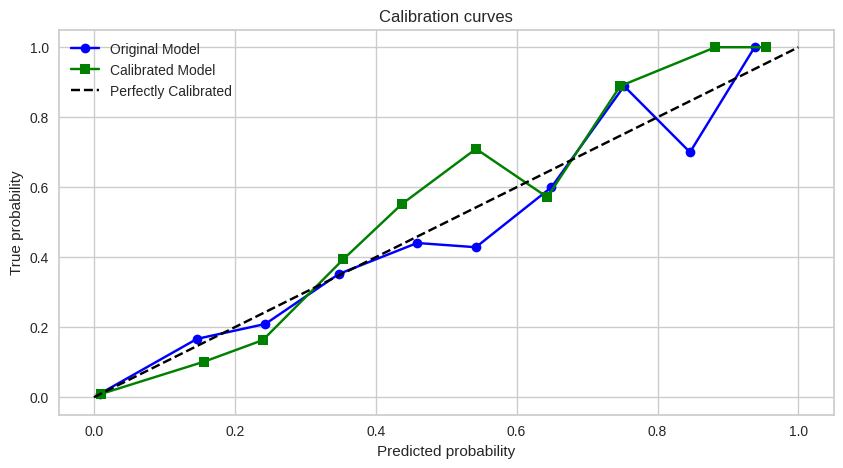

In [107]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
# Calcular las curvas de calibración para los modelos
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10, strategy='uniform')
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_prob_calibrated, n_bins=10, strategy='uniform')

# Graficar las curvas de calibración
plt.figure(figsize=(10, 5))

# Curva de calibración del modelo original
plt.plot(prob_pred, prob_true, marker='o', label='Original Model', color='blue')

# Curva de calibración del modelo calibrado
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='s', label='Calibrated Model', color='green')

# Curva de calibración ideal
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated', color='black')

plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration curves')
plt.legend()
plt.show()

Observando el modelo original:

*   El modelo muestra que las probabilidades predichas están razonablemente calibradas en las zonas de probabilidad más bajas (0.0 a 0.5).
*   Para zonas de probabilidad más altas (0.5+) el modelo presenta desviaciones.

Observando el modelo calibrado:
* El modelo substima ligeramente las probabilidades verdaderas en las probabilidades más bajas.
* Presenta una desviación en probabilidades en torno a 0.5.
* Sobreestima las probabilidades verdaderas en las probabilidades más altas (0.6 a 1.0)


